The given parameters for the rocket are:

M  = mass of the fuel

bM = mass of the payload (0 < b < 1)

u = ejection velocity of the rocket fuel (relative to the rocket)

q = rate of fuel burning (kg/s)

Thus the total mass of the rocket (fuel + payload) at time, t, is:

$$ m_{total} = M(1 + b) - qt $$

The net force on the rocket is:

$$ F_{net} = \frac{dp}{dt} = m\frac{dv}{dt} + v\frac{dm}{dt} $$

$$ -m_{total}g = m_{total}a + (u)(-q) $$

$$ a = -g + \frac{uq}{m_{total}} = -g + \frac{uq}{M(1+b) - qt} $$

The velocity at time t is then given by:

$$ v(t) = \int_0^t a dt  = -gt + uq \int_0^t \frac{dt}{M(1+b) - qt} $$ 

$$ v(t) = -gt + uq \left[ - \frac{1}{q} ln(M(1+b) - qt) \right]_0^t $$

$$ v(t) = -gt + u\cdot ln(M(1+b)) - u \cdot ln(M(1+b)-qt) $$

The position of the rocket at time t is then given by:

$$ x(t) = -\frac{1}{2}gt^2 + ut \cdot ln(M(1+b)) -u \int_0^t ln(M(1+b)-qt)) dt $$ 

$$ x(t) = -\frac{1}{2}gt^2 + ut \cdot ln(M(1+b)) -u \left[ \frac{M(1+b)}{q} ln(M(1+b)-qt) + t ln(M(1+b)-qt) - t   \right]_0^t $$

$$ x(t) = -\frac{1}{2}gt^2 + ut \cdot ln(M(1+b)) -u \left[ -\frac{M(1+b)}{q} ln(M(1+b)-qt) + t ln(M(1+b)-qt) -t +  \frac{M(1+b)}{q} ln(M(1+b)) \right] $$

$$ x(t) = -\frac{1}{2}gt^2 + ut \cdot ln(M(1+b)) + \frac{uM(1+b)}{q} ln(M(1+b)-qt) - ut\cdot ln(M(1+b)-qt) + ut - \frac{uM(1+b)}{q} ln(M(1+b)) $$

$$ x(t) = -\frac{1}{2}gt^2 + ln(M(1+b))[ ut - \frac{uM(1+b)}{q} ] - ln(M(1+b)-qt) [ ut - \frac{uM(1+b)}{q} ] + ut $$

$$ x(t) = -\frac{1}{2}gt^2 - u \cdot ln \left(\frac{M(1+b)}{M(1+b)-qt}\right) \left[ \frac{M(1+b)-qt}{q} \right] + ut $$

When the rocket fuel is spent, the total mass will be just the payload mass:

$$ m_{total} = bM $$

$$ M(1+b)-qt = bM $$

$$ t = \frac{M}{q} $$

At this time, the velocity will be:

$$ v(M/q) = -\frac{gM}{q} + u\cdot ln(M(1+b)) - u \cdot ln(bM) $$

$$ v(M/q) = -\frac{gM}{q} + u\cdot ln(\frac{1+b}{b})$$

and the position will be:

$$ x(M/q) = -\frac{gM^2}{2q^2} + \frac{uM}{q} \left[ 1 - b\cdot ln \left(\frac{1+b}{b}\right) \right] $$


In [1]:
import math
import matplotlib.pyplot as plt

def vel(g,M,b,u,q,t):
    c = M*(1+b)
    m = c - q*t
    return u*(math.log(c)-math.log(m))-g*t

def pos(g,M,b,u,q,t):
    c = M*(1+b)
    m = c - q*t
    return -0.5*g*t*t + u*t - m*u/q*math.log(c/m)
    
g = 9.805
M = 1.50E+07
b = 0.12
u = 1200.0
q = 9.6E+04

t = M/q

print ("Final velocity = ", vel(g,M,b,u,q,t))
print ("Final position = ", pos(g,M,b,u,q,t))

Final velocity =  1148.2794158085144
Final position =  17554.233609840383


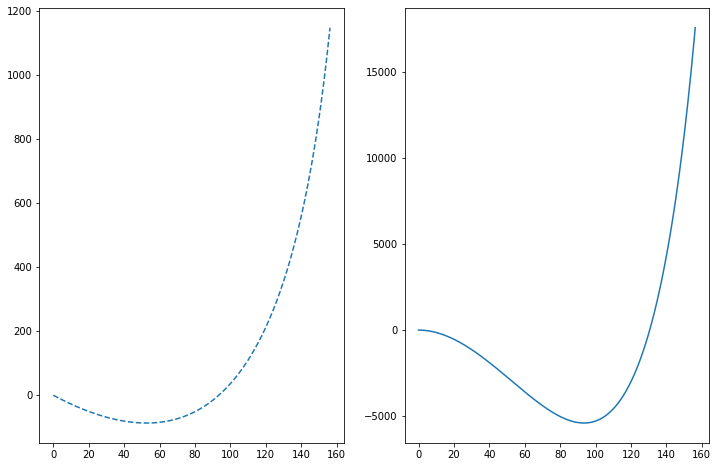

In [5]:
v = []
x = []
time = []
for i in range(1001):
    t = 1.0*i/1000.0*M/q
    time.append(t)
    v.append(vel(g,M,b,u,q,t))
    x.append(pos(g,M,b,u,q,t))

plt.rcParams['figure.figsize'] = [12, 8]
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].plot(time,v,'--')
axes[1].plot(time,x,'-')


plt.show()

In [3]:
ve = 11200.0 # escape velocity

fraction = math.exp((ve+g*M/q)/u)
b_max = 1.0/(fraction-1)
payload_max = b_max*M

print (payload_max)

370.0208610084992
